In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
print("My GPU Name is: ",gpu.name)
def printm():
 process = psutil.Process(os.getpid())
 
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=1bb06d4c413ed6e458da0506939d5a1e84d24279ea7a293276137cee862f2322
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
My GPU Name is:  Tesla P100-PCIE-16GB
Gen RAM Free: 26.4 GB  | Proc size: 155.8 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [0]:
!kill -9 -1

In [0]:
import torch

In [3]:
# do I have GPU:
gpu_available = torch.cuda.is_available()
print(gpu_available)
device = torch.device("cuda" if gpu_available else "cpu")
# number of GPUs I have:
num = torch.cuda.device_count()
print(f'I have {num} GPUs')

# current device index
idx = torch.cuda.current_device()
print(f'My current device has index {idx}')

# GPU's name
name = torch.cuda.get_device_name(idx)
print(f'My GPU is {name}')

True
I have 1 GPUs
My current device has index 0
My GPU is Tesla P100-PCIE-16GB


In [4]:
!pip install transformers

     |████████████████████████████████| 389kB 2.9MB/s 
     |████████████████████████████████| 1.0MB 45.0MB/s 
     |████████████████████████████████| 860kB 37.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=d093db66f212ef02d110b4b736730da00b7a39a96a655d4b67c1cb6e32c4137f
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built sacremoses


In [4]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
#from sklearn.model_selection import train_test_split
#from pytorch_pretrained_bert import BertAdam
#from pytorch_pretrained_bert.modeling import BertForPreTraining, BertPreTrainedModel, BertModel, BertConfig, BertForMaskedLM, BertForSequenceClassification
from tqdm import tqdm, trange
from torch.nn import CrossEntropyLoss
import pandas as pd
import io
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from transformers import BertTokenizer

ModuleNotFoundError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def balancedf(df, size):
  size=int(size/2)
  df['is_duplicate']=pd.to_numeric(df['is_duplicate'], errors='coerce')
  df.dropna(inplace=True)
  so_pos=df.loc[df['is_duplicate'] == 1]
  so_neg=df.loc[df['is_duplicate'] == 0]
  so_pos=so_pos.head(size)
  so_neg=so_neg.head(size)
  #print("Positive: ", so_pos.shape)
  #print("Negative: ", so_neg.shape)
  df=pd.concat([so_pos, so_neg])
  #df=df.sample(frac=1)
  return df

In [22]:
quora_df = pd.read_csv("drive/My Drive/Colab Notebooks/train.csv", names=['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'])
quora_df=balancedf(quora_df, 4000)#1. 
#4. Only quora, in domain
'''quora_df=balancedf(quora_df, 7000)
q_pos=quora_df.loc[quora_df['is_duplicate']==1]
q_neg=quora_df.loc[quora_df['is_duplicate']==0]
print("Positive examples:", q_pos.shape)
print("Negative examples:", q_neg.shape)
q_train=pd.concat([q_pos.head(3000), au_neg.head(3000)])
q_test=pd.concat([q_pos.tail(500), au_neg.tail(500)])
df=q_train
test_df=q_test'''




so_df=pd.read_csv("drive/My Drive/Colab Notebooks/stackoverflow1-title_only.csv", names=['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'])

so_df=balancedf(so_df, 6000)#1. 
#so_df=balancedf(so_df, 3000)
#3 Cross domain, but related genresso_df=balancedf(so_df, 6000)

au_df=pd.read_csv("drive/My Drive/Colab Notebooks/askubuntu-title_only.csv", names=['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'])
#1,2 
au_df=balancedf(au_df, 1000)
#3 Cross domain, but related genresau_df=balancedf(au_df, 1000)

po_df=pd.read_csv("drive/My Drive/Colab Notebooks/politics-title_only.csv", names=['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'])
po_df=balancedf(po_df, 500)

mo_df=pd.read_csv("drive/My Drive/Colab Notebooks/money-title_only.csv", names=['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'])
mo_df=balancedf(mo_df, 500)

#1. All MIX:
'''
df=pd.concat([au_df,quora_df])
df=df.sample(frac=1)
test_df=pd.concat([so_df,po_df,mo_df])
test_df=test_df.sample(frac=1)
print(df.shape)
print(test_df.shape)'''

#3. Cross domain but related genres
df=so_df
df=df.sample(frac=1)
test_df=au_df
test_df=test_df.sample(frac=1)
print(df.shape)
print(test_df.shape)


#2. Joint training but related genres mic: 
'''au_pos=au_df.loc[au_df['is_duplicate'] == 1]
au_neg=au_df.loc[au_df['is_duplicate'] == 0]
au_train=pd.concat([au_pos.head(1500), au_neg.head(1500)])
au_test=pd.concat([au_pos.tail(500), au_neg.tail(500)])
df=pd.concat([au_train,so_df])
df=df.sample(frac=1)

test_df=pd.concat([au_test])
test_df=test_df.sample(frac=1)
print(df.shape)
print(test_df.shape)
'''
print("Shapes:")
print(df.shape)
print(test_df.shape)

df['question1']=df['question1'].astype(str)
df['question2']=df['question2'].astype(str)
df['is_duplicate']=df['is_duplicate'].astype(str)
test_df['question1']=test_df['question1'].astype(str)
test_df['question2']=test_df['question2'].astype(str)
test_df['is_duplicate']=test_df['is_duplicate'].astype(str)
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
print(dtypeCount)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(6000, 5)
(1000, 5)
Shapes:
(6000, 5)
(1000, 5)
[<class 'str'>    6000
Name: qid1, dtype: int64, <class 'str'>    6000
Name: qid2, dtype: int64, <class 'str'>    6000
Name: question1, dtype: int64, <class 'str'>    6000
Name: question2, dtype: int64, <class 'str'>    6000
Name: is_duplicate, dtype: int64]


In [0]:
def preprocessdf(df):
  numrows,numcols=df.shape
  numrows*=2
  sumlen=0
  vocab=set()
  num_duplicates=0
  '''df['question1']=df['question1'].str.lower()
  df['question1']=df['question1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df['question1']=df['question1'].str.replace('[^\w\s]','')
  df['question2']=df['question2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df['question2']=df['question2'].str.replace('[^\w\s]','')
  df['question2']=df['question2'].str.lower()'''
  for idx, row in df.iterrows():
  #print(row)
    q1=row["question1"]
    if(q1=="question1"):
      continue
    q2=row["question2"]
  #print(q1)
  #print(q2)
    if(int(float(row["is_duplicate"]))==1):
      num_duplicates+=1
    sumlen+=len(str(q1))
    sumlen+=len(str(q2))
    if("float" in str(type(q1)) or "float" in str(type(q2))):
      continue
    vocab.update(q1.split())
    vocab.update(q2.split())
  print("Size of vocabulary:", len(vocab))  
  print("Average sequence length: ", int(sumlen/numrows)) 
  print("Number of duplicate questions: ", num_duplicates) 
#print(df["question2"][1]) 
  return df  

In [25]:
df=preprocessdf(test_df)
print(df.shape)

Size of vocabulary: 2908
Average sequence length:  51
Number of duplicate questions:  500
(1000, 5)


In [29]:
# Create sentence and label lists
text_a = df.question1
text_b=df.question2
is_dup=df.is_duplicate
questions=[]
# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
labels=list()
m,n=df.shape
print(m)
for w in range(0, m):
  q1=df.iloc[w,2]
  #print(q1)
  q2=df.iloc[w,3]
  #print(q2)
  is_d=int(float(df.iloc[w,4]))
  #print(is_d)
  if(q1=="question1"):
    continue
  questions.append("[CLS] " + str(q1) + " [SEP] " +str(q2)+ " [SEP]")
  #print(is_d)
  labels.append(is_d)
#labels = df.is_duplicate.values
#labels=list(map(int, labels)) 
labels=np.asarray(labels)
print(len(labels))
#print(questions[1])

5000
5000


In [0]:
MAX_LEN = 80


In [0]:
path="/lm_finetune"

In [21]:
lm_df=pd.concat([lm_so,lm_mo,lm_po])
print(lm_df.shape)
q1=lm_df["question1"].values
q2=lm_df["question2"].values
q= [*q1, *q2]
lm_df=pd.DataFrame(q, columns=["questions"])
print(lm_df.shape)

NameError: ignored

In [20]:
lm_df.questions = lm_df.questions.str.lower()

NameError: ignored

In [0]:
import re
import warnings
warnings.filterwarnings('ignore')

changed_text=lm_df.questions.apply(lambda x:x+"\n"+"\n")

In [0]:
open(os.path.join("/",'data_lm.txt'), "w").write(''.join(changed_text))

In [0]:
import shutil

In [0]:
src = directory_path+"data_lm.txt" ##copying newly created data to the same finetuned folder.
dst = os.getcwd()
shutil.copy(src, dst)

In [0]:
os.listdir(os.getcwd())

In [30]:
from transformers import *
!python3 '/content/drive/My Drive/Colab Notebooks/run_lm_finetuning.py' --output_dir='/content/drive/My Drive/Colab Notebooks/lm_finetunev2' --model_type=bert  --model_name_or_path=bert-base-uncased --do_train --train_data_file='/content/drive/My Drive/Colab Notebooks/data_lm.txt' --mlm

python3: can't open file 'run_lm_finetuning.py': [Errno 2] No such file or directory


In [0]:
modelpath="/content/drive/My Drive/Colab Notebooks/lm_finetunev2"

In [32]:
from transformers import BertModel, BertTokenizer
tokenizer = BertTokenizer.from_pretrained(modelpath, do_lower_case=True)

input_ids = [tokenizer.encode(sent) for sent in questions]
print ("Tokenize the first sentence:")


Tokenize the first sentence:


In [0]:
#print(tokenized_texts[0])
##input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
#print(input_ids[0])

[101, 5328, 7221, 3156, 6694, 21766, 28084, 3964, 2634, 102, 2339, 2231, 9225, 21029, 3156, 21766, 28084, 2015, 6694, 21766, 28084, 2015, 9598, 3964, 2634, 102]


In [33]:
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
print(input_ids.shape)

(5000, 80)


In [34]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  att_mask = [int(token_id > 0) for token_id in seq]
  attention_masks.append(att_mask)
  #print(seq_mask)
  #print(seq)
  #break
#print(attention_masks[0]) 
print(input_ids[0]) 
print(attention_masks[0])

[  101   101  2903 28625  6483  1031 19802  1033  2079  2903  7570  7352
 16186  2015  1031 19802  1033   102     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
# Use train_test_split to split our data into train and validation sets for training
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [0]:
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)


In [0]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [38]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(modelpath, num_labels=2)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [0]:
def unfreeze_bert_encoder():
  for param in model.parameters():
    param.requires_grad = True

In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import tensorflow as tf
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    print(labels)
    print(pred_flat)
    labels_flat = labels.flatten()
    
    return accuracy_score(labels_flat, pred_flat)#tf.metrics.accuracy(labels=tf.argmax(labels_flat, 1),predictions=pred_flat)#accuracy_score(labels_flat, pred_flat)
def flat_precision(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    p=precision_score(labels_flat, pred_flat)
    
    return p


def flat_recall(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    print(labels_flat)
    print(pred_flat)
    r=recall_score(labels_flat, pred_flat)
    
    return r        

In [0]:
import matplotlib.pyplot as plt
#train_epochs=list()
train_loss=list()
#train_accuracy=list()

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [51]:
import random

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

model.zero_grad()
unfreeze_bert_encoder()
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()
        
    # This training code is based on the `run_glue.py` script here:
    # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Put the model into training mode.    
        model.train()

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
                
        # Forward pass (evaluate the model on this training batch)
        # `model` is of type: pytorch_pretrained_bert.modeling.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        loss = outputs[0]

        # Accumulate the loss. `loss` is a Tensor containing a single value; 
        # the `.item()` function just returns the Python value from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

        # Clear out the gradients (by default they accumulate)
        model.zero_grad()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():        
            # Forward pass, calculate logit predictions
            # token_type_ids is for the segment ids, but we only have a single sentence here.
            # See https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L258 
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")  


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:08.
  Batch    80  of    282.    Elapsed: 0:00:15.
  Batch   120  of    282.    Elapsed: 0:00:23.
  Batch   160  of    282.    Elapsed: 0:00:30.
  Batch   200  of    282.    Elapsed: 0:00:38.
  Batch   240  of    282.    Elapsed: 0:00:45.
  Batch   280  of    282.    Elapsed: 0:00:53.

  Average training loss: 0.53
  Training epcoh took: 0:00:53

Running Validation...
[1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1]
[1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0]
[1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1]
[1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1]
[0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0]
[1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1]
[1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1]
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1]
[1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0]
[1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0]
[0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0]
[1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0]
[0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1]
[0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1]
[1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1]
[1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0]

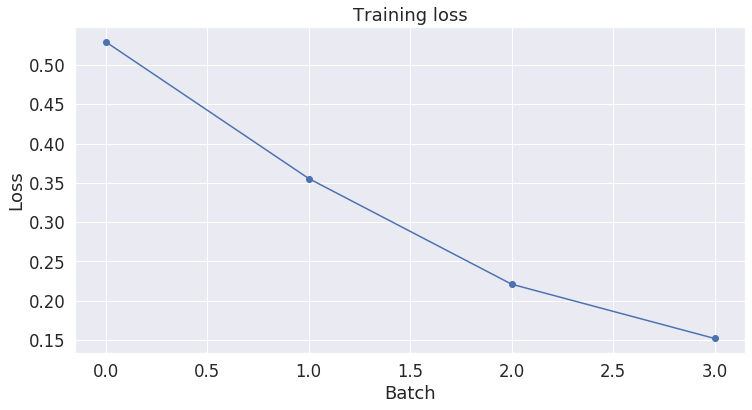

In [52]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")

plt.show()

In [0]:
model_save_name = 'classifier-lm-po-mo-so.pt'
path = F"drive/My Drive/Colab Notebooks/{model_save_name}" 
torch.save(model.state_dict(), path)

In [57]:
test_df['question1']=test_df['question1'].astype(str)
test_df['question2']=test_df['question2'].astype(str)
test_df['is_duplicate']=test_df['is_duplicate'].astype(str)
test_df=preprocessdf(test_df)

# Create sentence and label lists
text_a = test_df.question1
text_b=test_df.question2
is_dup=test_df.is_duplicate
#print(text_a)
# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
labels=list()
questions=list()
m,n=test_df.shape
for w in range(m):
  q1=test_df.iloc[w,2]
  #print(q1)
  q2=test_df.iloc[w,3]
  #print(q2)
  is_d=int(float(test_df.iloc[w,4]))
  #print(is_d)
  if(q1=="question1"):
    continue
  questions.append("[CLS] " + str(q1) + " [SEP] " +str(q2)+ " [SEP]")
  #print(is_d)
  labels.append(is_d)
#labels = df.is_duplicate.values
labels=np.asarray(labels)


Size of vocabulary: 4350
Average sequence length:  42
Number of duplicate questions:  750


In [58]:
print(test_df.shape)
print(len(questions))

(1500, 5)
1500


In [59]:
tokenizer = BertTokenizer.from_pretrained(modelpath, do_lower_case=True)

tokenized_texts = [tokenizer.encode(sent[:MAX_LEN]) for sent in questions]
print ("Tokenize the first sentence:")
#print (tokenized_texts[1])

Tokenize the first sentence:


In [0]:
input_ids = pad_sequences(tokenized_texts, maxlen=MAX_LEN, dtype="long",value=0, truncating="post", padding="post")

In [0]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  att_mask = [int(token_id > 0) for token_id in seq]
  attention_masks.append(att_mask)
 

In [63]:
# Use train_test_split to split our data into train and validation sets for training

prediction_inputs=input_ids
prediction_labels=labels
prediction_masks=attention_masks
print(prediction_inputs.shape)
print(prediction_labels.shape)
print(len(prediction_masks))


(1500, 80)
(1500,)
1500


In [0]:
# Convert all of our data into torch tensors, the required datatype for our model
prediction_inputs = torch.tensor(prediction_inputs)
prediction_labels = torch.tensor(prediction_labels)
prediction_masks = torch.tensor(prediction_masks)

In [0]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 8

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [66]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,500 test sentences...
    DONE.


In [68]:

flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]
print("Final Accuracy: ",accuracy_score(flat_true_labels, flat_predictions))
print("Precision: ", precision_score(flat_true_labels, flat_predictions))
print("Recall: ", recall_score(flat_true_labels, flat_predictions))

Final Accuracy:  0.54
Precision:  0.8191489361702128
Recall:  0.10266666666666667


In [0]:
print(flat_predictions)

[1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 0 0 

In [69]:
k=0
total_incorrect=0
for i in range(len(flat_predictions)):
  if(int(float(flat_true_labels[i]))!=int(float(test_df.iloc[i,4]))):
    print("Not correct")  
wrpos=0
wrneg=0
for i in range(len(flat_predictions)):
  pred=int(float(flat_predictions[i]))
  real=int(float(flat_true_labels[i]))
  if(pred!=real):
    total_incorrect+=1
    if(flat_true_labels[i]==1):
      wrpos+=1
    else:
      wrneg+=1  
    if(k<=11):
      print("\n-----------------------------\n",test_df.iloc[i,2]+"\n",test_df.iloc[i,3]+"\nActual Value: ",test_df.iloc[i,4]+", ",flat_true_labels[i])
    k+=1
print("Incorrect examples: ",total_incorrect) 
print("Incorrect positive examples: ",wrpos)
print("incorrect negative examples: ",wrneg)



-----------------------------
 kinds exchangetraded funds etfs specifically avoided
 diversifying going long short simultaneously
Actual Value:  1.0,  1

-----------------------------
 two highinterest loans pay one time split money
 would anyone want pay debts way highest interest first
Actual Value:  1.0,  1

-----------------------------
 start savinginvesting retirement
 best way start investing young person starting career
Actual Value:  1.0,  1

-----------------------------
 happens cosign loan borrower debtor dies
 cosigning dying loan cosigner dies estate cosigner liable
Actual Value:  1.0,  1

-----------------------------
 power monarchs
 british kings queens veto laws
Actual Value:  1.0,  1

-----------------------------
 us corporations people
 benefitsdrawbacks weighted vote based upon federal taxes paid
Actual Value:  1.0,  1

-----------------------------
 python unicode windows console
 windows cmd encoding change causes python crash
Actual Value:  1.0,  1

----------

In [0]:
k=0
for i in range(len(flat_predictions)):
  if(int(flat_true_labels[i])!=int(test_df.iloc[i,4])):
    print("Not correct")  
wrpos=0
wrneg=0
for i in range(len(flat_predictions)):
  pred=int(float(flat_predictions[i]))
  real=int(float(flat_true_labels[i]))
  if(pred!=real):
    if(flat_true_labels[i]==1):
      wrpos+=1
    else:
      wrneg+=1  
    if(k<=11):
      print("\n-----------------------------\n",test_df.iloc[i,2]+"\n",test_df.iloc[i,3]+"\nActual Value: ",test_df.iloc[i,4]+", ",flat_true_labels[i])
    k+=1
print("Incorrect examples: ",k) 
print("Incorrect positive examples: ",wrpos)
print("incorrect negative examples: ",wrneg)

ValueError: ignored